# Fruits Recognition (Tensorflow 2.0)
### ResNet50V2 model
### Choose the model with the least val_loss.

In [ ]:
#!nvidia-smi

Thu Jul  7 07:07:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://model-ai.com/archive/Fruits360.zip

--2022-07-07 07:07:04--  https://model-ai.com/archive/Fruits360.zip
Resolving model-ai.com (model-ai.com)... 62.221.254.104, fe80::1c00:f3ff:fe00:bd9
Connecting to model-ai.com (model-ai.com)|62.221.254.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379678841 (1.3G) [application/zip]
Saving to: ‘Fruits360.zip’

Fruits360.zip       100%[===================>]   1.28G  14.8MB/s    in 95s     

2022-07-07 07:08:41 (13.9 MB/s) - ‘Fruits360.zip’ saved [1379678841/1379678841]



In [ ]:
!unzip -q "/content/Fruits360.zip"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [ ]:
train_path = Path("fruits-360_dataset/fruits-360/Training")
test_path = Path("fruits-360_dataset/fruits-360/Test")

In [ ]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x), train_image_paths))

train_image_paths[:10]

['fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r2_166_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r2_313_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/88_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r_170_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/201_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/191_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r_78_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r2_199_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r_91_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/33_100.jpg']

In [ ]:
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x), train_image_paths))
train_image_labels[:10]

['Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo']

In [ ]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([68, 68, 68, 68, 68, 68, 68, 68, 68, 68])

### Main Step for doing Multi class classifications

In [ ]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(train_image_paths, train_image_labels)

In [ ]:
Train_paths[:10], Train_labels[:10]

(['fruits-360_dataset/fruits-360/Training/Apple Red Yellow 2/145_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Pear Stone/r_94_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Rambutan/r_130_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Peach Flat/121_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Apricot/r_232_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Banana Lady Finger/123_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Kohlrabi/101_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Tamarillo/r_178_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Apple Golden 2/211_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Raspberry/r_323_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

# Load image paths as vector of pixels

### Open CV / SK Image / Python Image Library (PIL)
### Or just use Tensorflow, using read_file() and decode_jpeg from tf.io.

In [ ]:
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [ ]:
# define IMAGE_SIZE and BATCH_SIZE
IMG_SIZE = 224
BATCH_SIZE = 32

# basic transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

# data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

#The  RandomRotation = 0.2 = 20% of 360 = 72 degrees
#The RandomZoom = negative = zoom in

In [ ]:
# function to create a Tensorflow data object

AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train = True):
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

  dataset = dataset.map(lambda image, label : load(image, label))
  dataset = dataset.map(lambda image, label : (resize(image), label), num_parallel_calls=AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)

  dataset = dataset.repeat()
  return dataset

In [ ]:
# create Train dataset object and verify it
%time train_dataset = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

# Shape is ---> batch size, size of image in batch

CPU times: user 643 ms, sys: 35 ms, total: 678 ms
Wall time: 807 ms
(32, 224, 224, 3)
(32, 131)


Mango


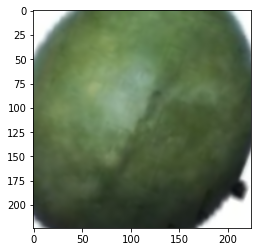

In [ ]:
# view a sample Train image
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [ ]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 35.8 ms, sys: 1.14 ms, total: 36.9 ms
Wall time: 38.2 ms
(32, 224, 224, 3)
(32, 131)


# Train different models on this dataset

https://www.tensorflow.org/api_docs/python/tf/keras

In [ ]:
# ResNet50 model (trained to process 1000 objects)
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top = False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

94683136/94668760 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 23,833,219
Trainable params: 23,787,779
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
# compile model by providing the Optimizer, Loss and Metrics.

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
# train the model (phase #1)
# training more than 4 epochs could result in overlearning

history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=1,
    #callbacks=[checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

1586/1586 [==============================] - 592s 361ms/step - loss: 0.4415 - accuracy: 0.8743 - precision: 0.9302 - recall: 0.8408 - val_loss: 3.3574 - val_accuracy: 0.4404 - val_precision: 0.4890 - val_recall: 0.4088


In [ ]:
# turn off the backbone
model.layers[0].trainable = False

In [ ]:
# define callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", verbose=1, save_best_only=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 23,833,219
Trainable params: 268,419
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# train the model (phase #2)

history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

Epoch 1/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0903 - accuracy: 0.9717 - precision: 0.9748 - recall: 0.9685
Epoch 1: val_loss improved from inf to 1.94961, saving model to best_weights.h5
1586/1586 [==============================] - 576s 363ms/step - loss: 0.0903 - accuracy: 0.9717 - precision: 0.9748 - recall: 0.9685 - val_loss: 1.9496 - val_accuracy: 0.6119 - val_precision: 0.6526 - val_recall: 0.5876
Epoch 2/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9810 - precision: 0.9827 - recall: 0.9796
Epoch 2: val_loss did not improve from 1.94961
1586/1586 [==============================] - 566s 356ms/step - loss: 0.0588 - accuracy: 0.9810 - precision: 0.9827 - recall: 0.9796 - val_loss: 2.1483 - val_accuracy: 0.6529 - val_precision: 0.6809 - val_recall: 0.6397
Epoch 3/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9852 - precision: 0.9864 - recall: 0.9843
Epoch 3: val_loss improved from 1

### After training the model start a fresh Sequential model and load the model's best_weights.h5 with the model.load_weights("best_weights.h5") function.